In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


#  World Happiness Report 2024 - Detaylı Veri Analizi (EDA)

Bu çalışma, 2024 Dünya Mutluluk Raporu verilerini kullanarak ülkelerin mutluluk seviyelerini ve bu mutluluğu etkileyen temel faktörleri incelemektedir. 

### Analiz Kapsamı:
* Mutluluk skorlarının küresel dağılımı.
* Bölgesel bazda refah farklılıkları.
* Ekonomi, sosyal destek ve özgürlükler gibi faktörlerin mutlulukla korelasyonu.
* En mutlu ve en mutsuz ülkelerin karşılaştırılması.



## Analizde kullanılan 12 temel sütun ve bu değişkenlerin temsil ettiği kavramlar aşağıda açıklanmıştır:

1.  **Country name:** Analize dahil edilen ülkenin adı.
2.  **Regional indicator:** Ülkenin yer aldığı coğrafi bölge (Örn: Western Europe, Sub-Saharan Africa).
3.  **Ladder score:** 0-10 Arası ana mutluluk puanı.
4.  **Log GDP per capita:** Ekonomik refah.
5.  **Social support:** Sosyal destek.
6.  **Healthy life expectancy:** Bireylerin sağlıklı bir şekilde yaşaması beklenen ortalama yıl sayısı.
7.  **Freedom to make life choices:** Bireylerin kendi hayat kararlarını verme konusundaki özgürlük seviyesi.
8. **Generosity:** Ülke içindeki bağış yapma ve yardımlaşma eğiliminin ekonomik verilerle düzeltilmiş hali.
9. **Perceptions of corruption:** Hükümet ve iş dünyasındaki yolsuzluk yaygınlığına dair bireysel algılar.
10. **Dystopia + residual:** Dünyanın en mutsuz ülkesi (Dystopia) baz alınarak yapılan kıyaslama ve modeldeki açıklanamayan hata payı (artık değer).

In [2]:
import warnings
warnings.filterwarnings('ignore') # uyarıları gizler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns

# read data
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding='latin-1')
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268





Veri seti yüklendi. Yukarıdaki tabloda görüldüğü üzere, ülkelerin mutluluk skorları (`Ladder score`) ile birlikte ekonomik ve sosyal değişkenler yer almaktadır. Şimdi eksik verileri kontrol edip görselleştirme aşamasına geçeceğiz.

In [3]:
print(df.info())

print("\nEksik Değer Sayısı:\n", df.isnull().sum()) #eksik veri kontrolü

df.columns = [c.strip() for c in df.columns] #boşluklar varsa kaldırır

df.describe() #istatiksel özet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
None

Eksi

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [4]:
df2024 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding='latin-1')
df2024.head(5)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


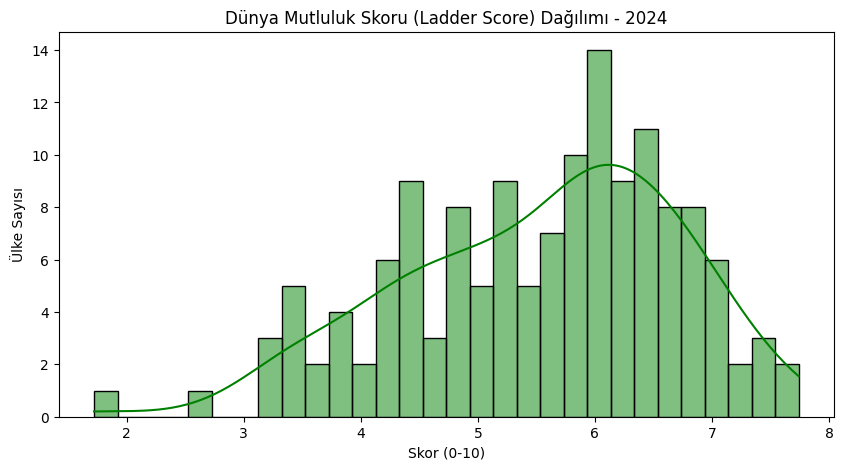

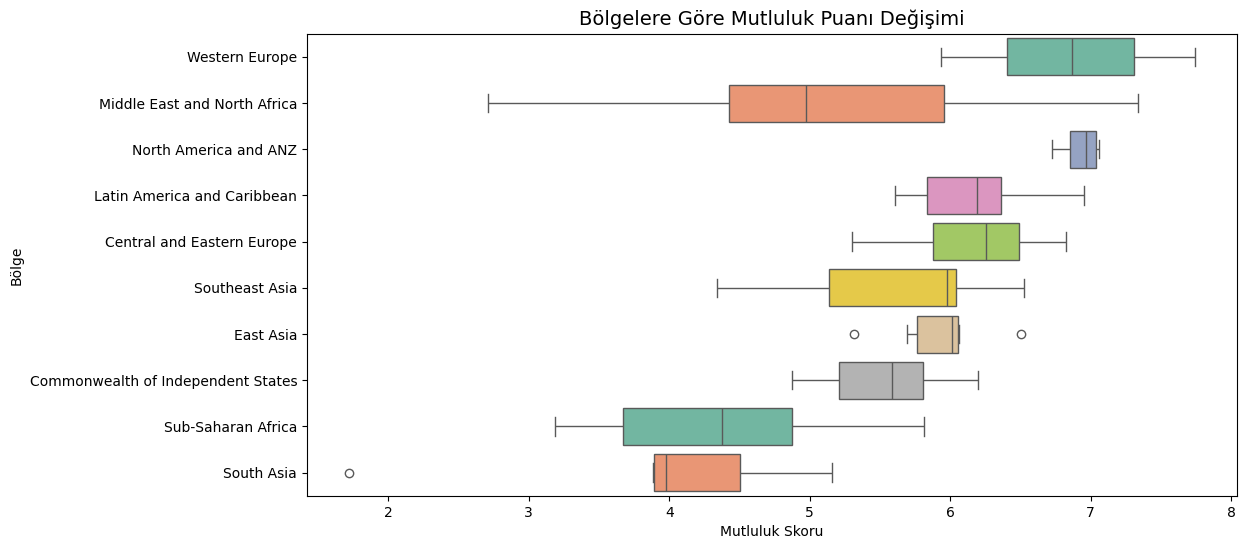

In [5]:
#  genel mutluluk dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(df2024['Ladder score'], kde=True, color='green', bins=30)
plt.title('Dünya Mutluluk Skoru (Ladder Score) Dağılımı - 2024', fontsize=12)
plt.xlabel('Skor (0-10)')
plt.ylabel('Ülke Sayısı')
plt.show()

# bölgelere göre mutluluk dağılımı (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ladder score', y='Regional indicator', data=df2024, palette='Set2')
plt.title('Bölgelere Göre Mutluluk Puanı Değişimi', fontsize=14)
plt.xlabel('Mutluluk Skoru')
plt.ylabel('Bölge')
plt.show()

### Grafik Analizi:

1. **Mutluluk Dağılımı (Histogram):**  Dünya genelinde mutluluk skorları **6.0 bandında** yoğunlaşmaktadır. 
   * Skorda 8'in üzerine çıkan "çok mutlu" ülke sayısı ile 3'ün altında kalan "çok mutsuz" ülke sayısı oldukça azdır, bu da uç değerlerin daha nadir olduğunu gösterir.


2. **Bölgesel Kıyaslama (Boxplot):**
   * **Batı Avrupa ve Kuzey Amerika:** Sadece en yüksek ortalamaya sahip olmakla kalmıyor, aynı zamanda kutu boylarının dar olması nedeniyle ülkeler arası farkın da daha az olduğu görülüyor.
   * **Sahra Altı Afrika ve Güney Asya:** Bu bölgeler hem en düşük skorlara sahip hem de veri dağılımı daha geniş. Bu durum, aynı bölge içindeki ülkeler arasında refah ve mutluluk eşitsizliği olduğunu gösteriyor.
   * **Outliers:** Boxplot üzerindeki noktalar, kendi bölgesinin genel eğiliminden pozitif veya negatif yönde ayrışan "outlier" ülkeleri temsil etmektedir.

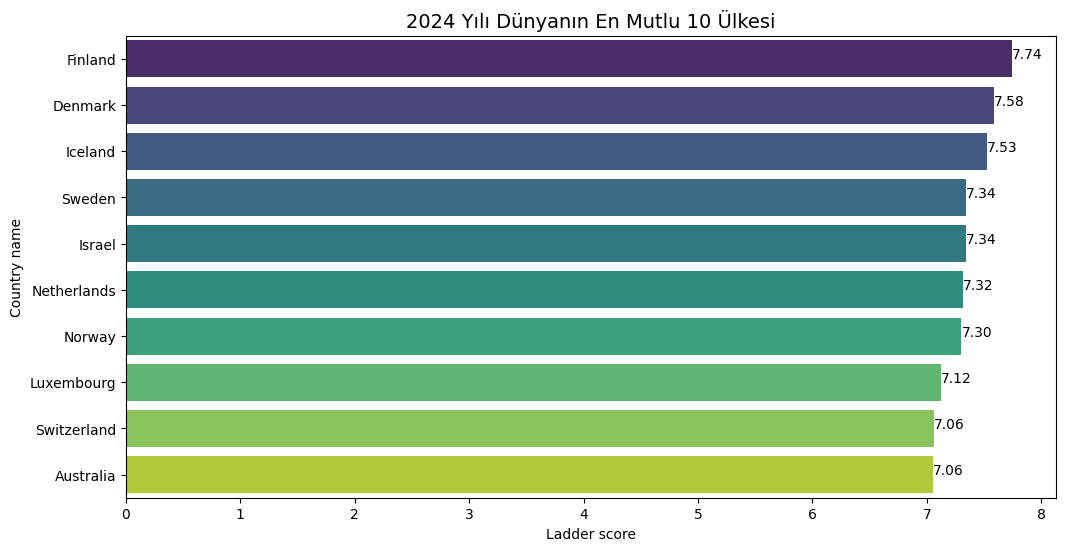

In [6]:
# C. en mutlu 10 ülke
top_10 = df2024.nlargest(10, 'Ladder score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Ladder score', y='Country name', data=top_10, palette='viridis')
for index, value in enumerate(top_10['Ladder score']):
    plt.text(value, index, f'{value:.2f}')
plt.title('2024 Yılı Dünyanın En Mutlu 10 Ülkesi', fontsize=14)
plt.show()

### En mutlu 10 ülke için yorum:

1. **Kuzey Avrupa:** Listede İskandinav ülkelerinin (Finlandiya, Danimarka, İzlanda vb.) ağırlığı net bir şekilde görülmektedir. Bu ülkelerin ortak özelliği; sadece yüksek gelir değil, aynı zamanda güvene dayalı toplum yapısı ve güçlü sosyal devlet modelleridir.
2. **Yüksek Skor İstikrarı:** En mutlu ilk 10 ülkenin skorları birbirine oldukça yakındır ve tamamı **7.2 puan barajının üzerindedir.** Bu, bu ülkelerde yaşam kalitesinin istikrarlı bir şekilde yüksek seyrettiğini gösterir.

##  Faktörler Arası İlişkiler:

Bu bölümde, mutluluğu sadece tek bir değişkenle değil, tüm faktörlerin birbirleriyle olan etkileşimiyle inceliyoruz. İlk olarak bir **Korelasyon Isı Haritası** ile hangi değişkenlerin birlikte hareket ettiğini, ardından en belirleyici iki faktörün (Ekonomi ve Sağlık) mutluluk üzerindeki etkisini **Regresyon Analizi** ile detaylandıracağız.

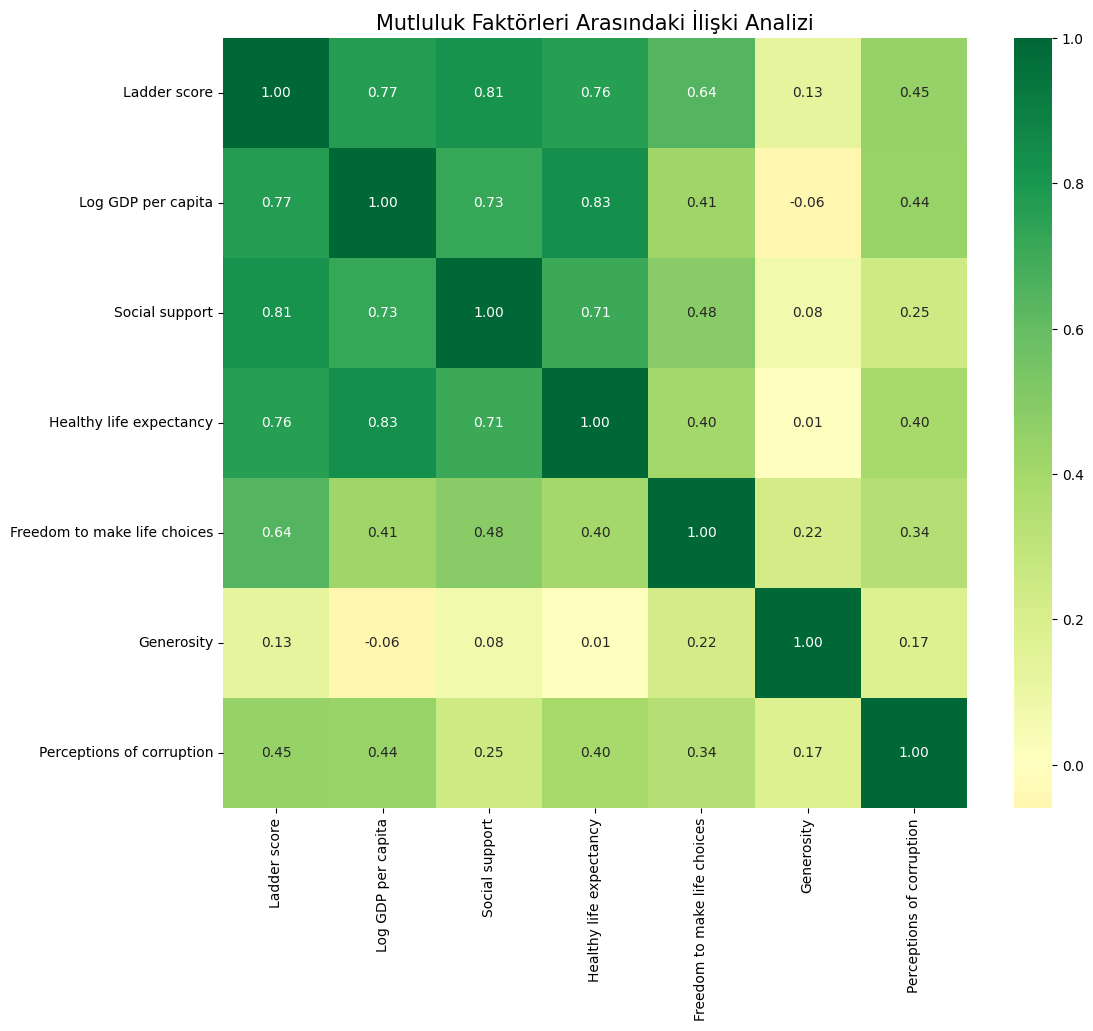

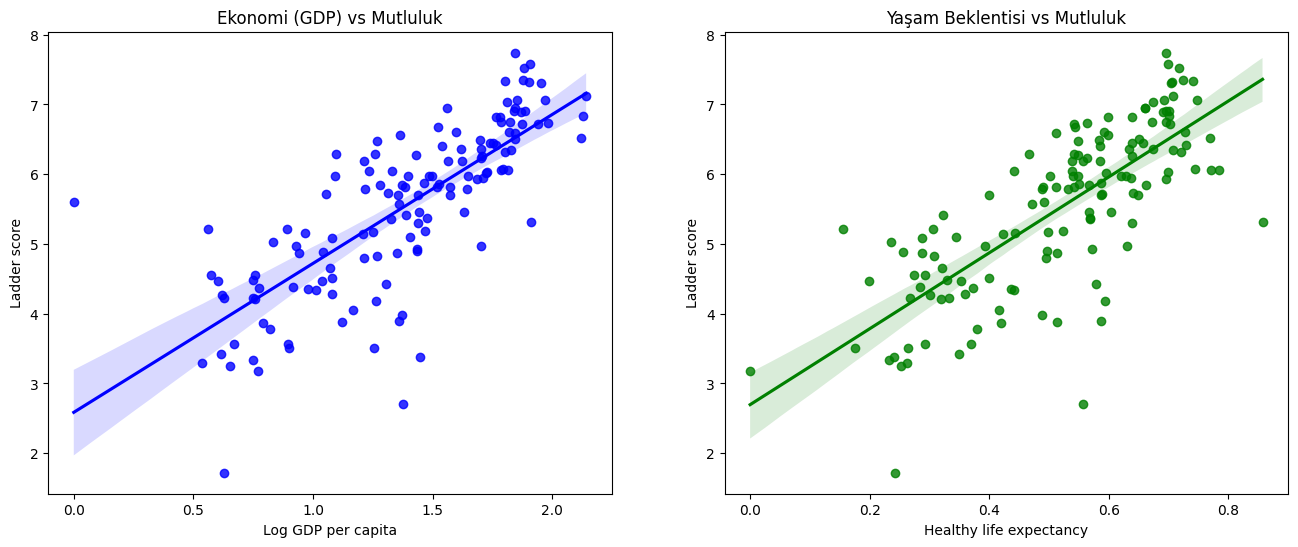

In [7]:
# D. korelasyon ısı haritası
plt.figure(figsize=(12, 10))

cols_to_corr = ['Ladder score', 'Log GDP per capita', 'Social support', 
                'Healthy life expectancy', 'Freedom to make life choices', 
                'Generosity', 'Perceptions of corruption']
corr_matrix = df2024[cols_to_corr].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Mutluluk Faktörleri Arasındaki İlişki Analizi', fontsize=15)
plt.show()

# ekonomi ve sağlıklı yaşamın mutluluk üzerindeki etkisi
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(x='Log GDP per capita', y='Ladder score', data=df2024, ax=ax[0], color='blue')
ax[0].set_title('Ekonomi (GDP) vs Mutluluk')

sns.regplot(x='Healthy life expectancy', y='Ladder score', data=df2024, ax=ax[1], color='green')
ax[1].set_title('Yaşam Beklentisi vs Mutluluk')

plt.show()

### Analiz:

1. **Mutluluğun En Güçlü Yakıtları:** * Korelasyon matrisine göre `Ladder score` (Mutluluk Skoru) ile en yüksek pozitif ilişkiye sahip değişkenler sırasıyla: **Log GDP per capita** (0.7+), **Social support** ve **Healthy life expectancy**'dir. 

2. **Negatif ve Düşük Korelasyonlar:** * **Perceptions of corruption** (Yolsuzluk algısı) ile mutluluk arasında beklendiği üzere negatif bir korelasyon vardır. 

3. **Regresyon Analizi Yorumu (GDP & Sağlık):**
   * Her iki scatter grafiğinde de yükselen bir regresyon doğrusu görülmektedir. 
   * Veri noktalarının doğru etrafında dar bir bantta toplanması, ekonomik büyümenin ve sağlık hizmetlerine erişimin mutluluk üzerinde doğrudan bir etkisi olduğunu ortaya koyar.

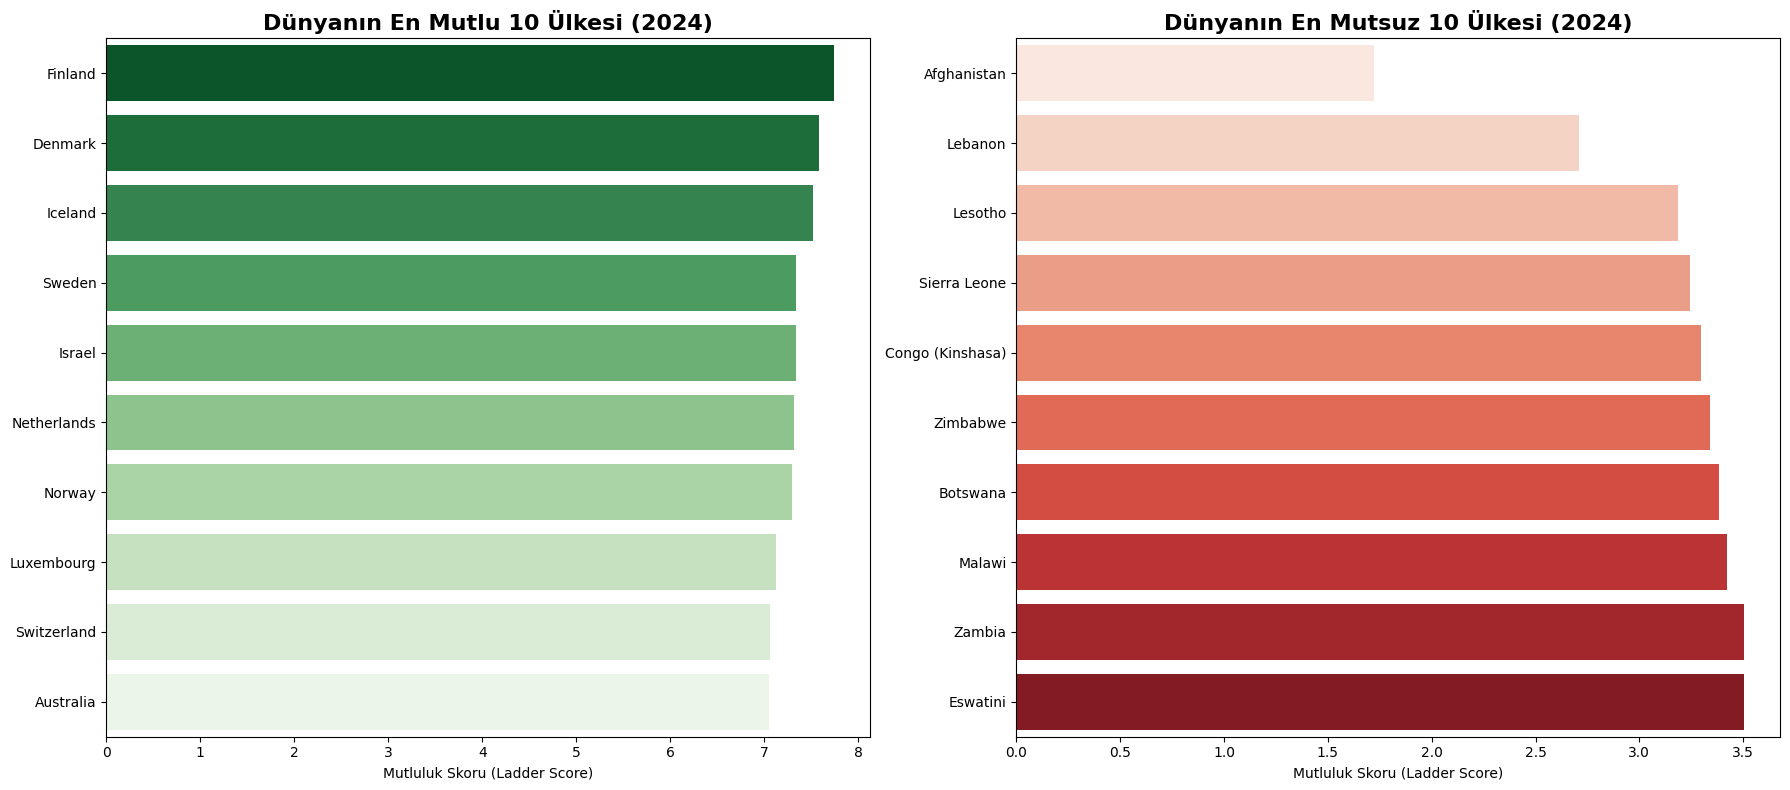

In [8]:
# en mutlu ve en mutsuz 10 ülke
top_10 = df2024.nlargest(10, 'Ladder score')
bottom_10 = df2024.nsmallest(10, 'Ladder score')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. grafik: en mutlu 10 ülke 
sns.barplot(x='Ladder score', y='Country name', data=top_10, palette='Greens_r', ax=axes[0])
axes[0].set_title('Dünyanın En Mutlu 10 Ülkesi (2024)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Mutluluk Skoru (Ladder Score)')
axes[0].set_ylabel('') # Y ekseni ismini temizle

# 2. grafik: en mutsuz 10 ülke 
sns.barplot(x='Ladder score', y='Country name', data=bottom_10, palette='Reds', ax=axes[1])
axes[1].set_title('Dünyanın En Mutsuz 10 Ülkesi (2024)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Mutluluk Skoru (Ladder Score)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Grafiklerin Analizi:

1. **Uçurumun Boyutu:** * En mutlu ülke olan **Finlandiya** (yaklaşık 7.7 - 7.8 puan) ile en mutsuz ülke olan **Afganistan** (yaklaşık 1.7 - 1.8 puan) arasında **6 puandan fazla bir fark** bulunmaktadır. 
   * Bu fark, sadece bir puanlama değil; temel insan hakları, güvenlik, sağlık hizmetlerine erişim ve ekonomik istikrar arasındaki uçurumun sayısal bir ifadesidir.

2. **Bölgesel Kümelenme:**
   * **En Mutlu 10 Ülke:** Tamamı yüksek gelirli, güçlü sosyal güvenlik sistemlerine sahip ve demokratik istikrarın yüksek olduğu ülkelerden (Kuzey Avrupa, Okyanusya vb.) oluşmaktadır.
   * **En Mutsuz 10 Ülke:** Bu ülkelerin büyük bir kısmı savaş, siyasi istikrarsızlık ve aşırı yoksullukla mücadele eden bölgelerde (Sahra Altı Afrika ve Orta Doğu) yer almaktadır.
